# **Project 3**, APS1070 Winter 2022
#### **PCA [10 marks]**
**Deadline: July 23rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Yusuf Olonade
*   **Student number**: 1006814743



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [1 Mark]

In [36]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

In [37]:
cases_raw


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot) so you can easily compare them).
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of Covid cases negative?) What does the sign of values indicate? **[0.25]**

In [38]:
#1. Time-series plotter function
import numpy as np
import matplotlib.pyplot as plt

def time_series_plotter(df, countries_list):
  date_list=[]
  for i in range(0, df.shape[1], 80):
    date_list.append(df.columns[i])
  for i in range(len(countries_list)):
    plt.subplot(len(countries_list), 1, i+1)
    plt.plot(df.columns, df.loc[countries_list[i]].values)
    plt.title(f"{countries_list[i]} COVID Cases")
    plt.ylabel("Confirmed Cases")
    plt.xlabel("Date")
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(ticks = np.arange(0, df.shape[1], 80), labels = date_list, size='small')

In [39]:
#2. Standardizing the dataset
from sklearn.preprocessing import StandardScaler

cases_std = StandardScaler().fit_transform(cases_raw)
cases_std

array([[-0.07279097, -0.0729525 , -0.07325203, ..., -0.25562405,
        -0.25625194, -0.25692586],
       [-0.07279097, -0.0729525 , -0.07325203, ..., -0.24216601,
        -0.24252661, -0.24300167],
       [-0.07279097, -0.0729525 , -0.07325203, ..., -0.24405074,
        -0.24440313, -0.2447969 ],
       ...,
       [-0.07279097, -0.0729525 , -0.07325203, ..., -0.2792973 ,
        -0.27978951, -0.28039988],
       [-0.07279097, -0.0729525 , -0.07325203, ..., -0.23320019,
        -0.23386912, -0.23456725],
       [-0.07279097, -0.0729525 , -0.07325203, ..., -0.24474442,
        -0.2454076 , -0.24612222]])

In [40]:
cases_raw.iloc[:, 0].mean(), cases_std[:, 0].mean()

(2.8418367346938775, 1.8126090197961738e-17)

In [41]:
cases_raw.iloc[:, 0].var(), cases_std[:, 0].var()

(1532.0210099424385, 0.9999999999999999)

In [42]:
# Visualizing the standardized dataset in a pandas dataframe

cases_std_df = pd.DataFrame(data=cases_std, index=cases_raw.index, columns=cases_raw.columns)
cases_std_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.254553,-0.254982,-0.255055,-0.255169,-0.254794,-0.255016,-0.255453,-0.255624,-0.256252,-0.256926
Albania,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.242599,-0.242745,-0.242623,-0.242692,-0.242044,-0.242016,-0.242233,-0.242166,-0.242527,-0.243002
Algeria,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.243246,-0.243669,-0.243729,-0.243844,-0.243513,-0.243674,-0.244009,-0.244051,-0.244403,-0.244797
Andorra,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.276497,-0.276791,-0.276722,-0.276669,-0.276027,-0.275992,-0.275892,-0.275730,-0.276244,-0.276866
Angola,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.265689,-0.266015,-0.265991,-0.265983,-0.265436,-0.265455,-0.265758,-0.265772,-0.266309,-0.266857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,-0.072791,-0.029292,-0.042737,-0.053076,-0.059572,-0.063104,-0.067417,-0.067945,-0.068994,-0.069665,...,0.057832,0.058149,0.058581,0.055760,0.058247,0.056585,0.055790,0.054531,0.054536,0.055156
West Bank and Gaza,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.200764,-0.201547,-0.201990,-0.202228,-0.202459,-0.203216,-0.203988,-0.204589,-0.205525,-0.206386
Yemen,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.279847,-0.280119,-0.280025,-0.279927,-0.279231,-0.279148,-0.279380,-0.279297,-0.279790,-0.280400
Zambia,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.231534,-0.231893,-0.231944,-0.232160,-0.231921,-0.232267,-0.232832,-0.233200,-0.233869,-0.234567


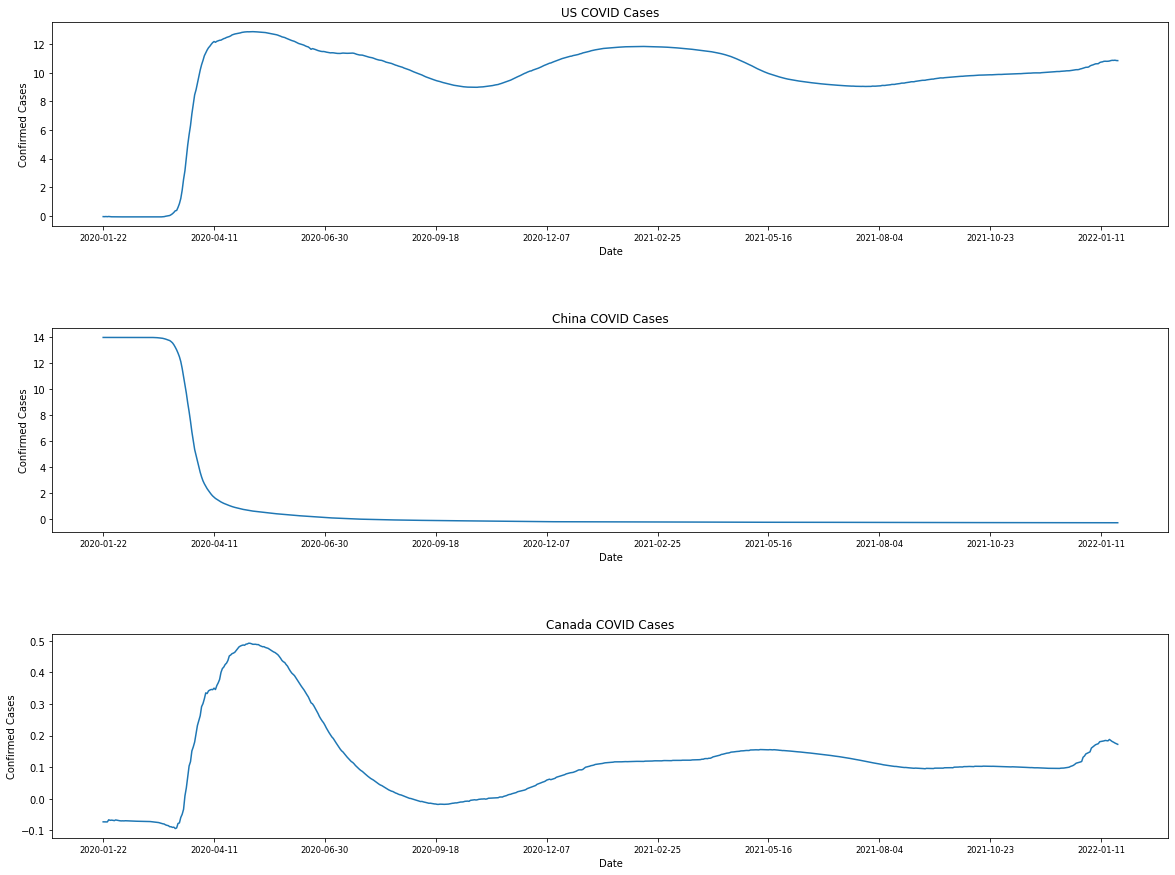

In [43]:
#3. Time-series plot for US, China and Canada

df = cases_std_df
countries_list = ['US', 'China', 'Canada']
plt.rcParams["figure.figsize"] = [20,15]             
time_series_plotter(df, countries_list)

4) The trend in the US and Canada time-series started close to the average and began to rise steadily while China started much above the average and decreased steadily. Since the global cases have been standardized to have a mean of zero (0) and standard deviation of one (1), the time-series plot for each country can be easily compared relative to other countries. If the curve rises above zero (mean) in any particular day for any country (e.g US), it simply means COVID cases in US are rising above the global average for that day and this calls for an emergency response. On the other hand when the curve goes down, say below zero to a negative values, it means cases are reducing below the global average.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1) and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each component and a line to show cumulative --similar to tutorial. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any differences in their trend? **[0.5]**

In [44]:
#1. Computing co-variance matrix of the dataframe

C = np.cov(df.T)
C
# or n, m = df.shape
# C = np.dot(df.T, df) / (n-1)

array([[ 1.00512821,  1.00512126,  1.00511414, ..., -0.01743542,
        -0.01747945, -0.0175254 ],
       [ 1.00512126,  1.00512821,  1.00512134, ..., -0.0176613 ,
        -0.01770506, -0.01775095],
       [ 1.00511414,  1.00512134,  1.00512821, ..., -0.01690253,
        -0.01694052, -0.01698123],
       ...,
       [-0.01743542, -0.0176613 , -0.01690253, ...,  1.00512821,
         1.00511854,  1.00510009],
       [-0.01747945, -0.01770506, -0.01694052, ...,  1.00511854,
         1.00512821,  1.00512153],
       [-0.0175254 , -0.01775095, -0.01698123, ...,  1.00510009,
         1.00512153,  1.00512821]])

In [45]:
C.shape

(733, 733)

In [46]:
#2. Building a function that returns sorted eigenvalues and eigenvectors

def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov)
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  return eigenVectors, eigenValues
get_sorted_eigen(C)

(array([[ 7.59424602e-05,  1.21711020e-01, -4.06068889e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.57839673e-05,  1.21707808e-01, -4.06261870e-02, ...,
          8.27653576e-03,  3.27651594e-03,  2.37772462e-02],
        [ 9.16226464e-05,  1.21724974e-01, -4.05405387e-02, ...,
         -4.36723539e-02, -1.02934010e-02,  8.21979560e-03],
        ...,
        [ 3.95020907e-02, -6.24161862e-04,  8.10875226e-03, ...,
         -5.65911267e-02,  7.63789773e-02,  2.77308845e-02],
        [ 3.94917946e-02, -6.36088813e-04,  7.87831025e-03, ...,
          2.41776295e-02, -2.38523754e-02, -2.94946351e-02],
        [ 3.94823319e-02, -6.00418673e-04,  8.05737147e-03, ...,
         -7.57786943e-03,  6.86823906e-03,  3.11953582e-02]]),
 array([ 6.29751397e+02,  6.35799591e+01,  2.93548081e+01,  8.92132873e+00,
         2.63636494e+00,  1.12487598e+00,  4.65343576e-01,  3.26308441e-01,
         1.89140012e-01,  1.63513238e-01,  7.41120116e-02,  5.03344793e-02,
 

In [47]:
# Sorted eigenValues and eigenVectors

eigenValues, eigenVectors = np.linalg.eigh(C)
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
eigenVectors, eigenValues

(array([[ 7.59424602e-05,  1.21711020e-01, -4.06068889e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.57839673e-05,  1.21707808e-01, -4.06261870e-02, ...,
          8.27653576e-03,  3.27651594e-03,  2.37772462e-02],
        [ 9.16226464e-05,  1.21724974e-01, -4.05405387e-02, ...,
         -4.36723539e-02, -1.02934010e-02,  8.21979560e-03],
        ...,
        [ 3.95020907e-02, -6.24161862e-04,  8.10875226e-03, ...,
         -5.65911267e-02,  7.63789773e-02,  2.77308845e-02],
        [ 3.94917946e-02, -6.36088813e-04,  7.87831025e-03, ...,
          2.41776295e-02, -2.38523754e-02, -2.94946351e-02],
        [ 3.94823319e-02, -6.00418673e-04,  8.05737147e-03, ...,
         -7.57786943e-03,  6.86823906e-03,  3.11953582e-02]]),
 array([ 6.29751397e+02,  6.35799591e+01,  2.93548081e+01,  8.92132873e+00,
         2.63636494e+00,  1.12487598e+00,  4.65343576e-01,  3.26308441e-01,
         1.89140012e-01,  1.63513238e-01,  7.41120116e-02,  5.03344793e-02,
 

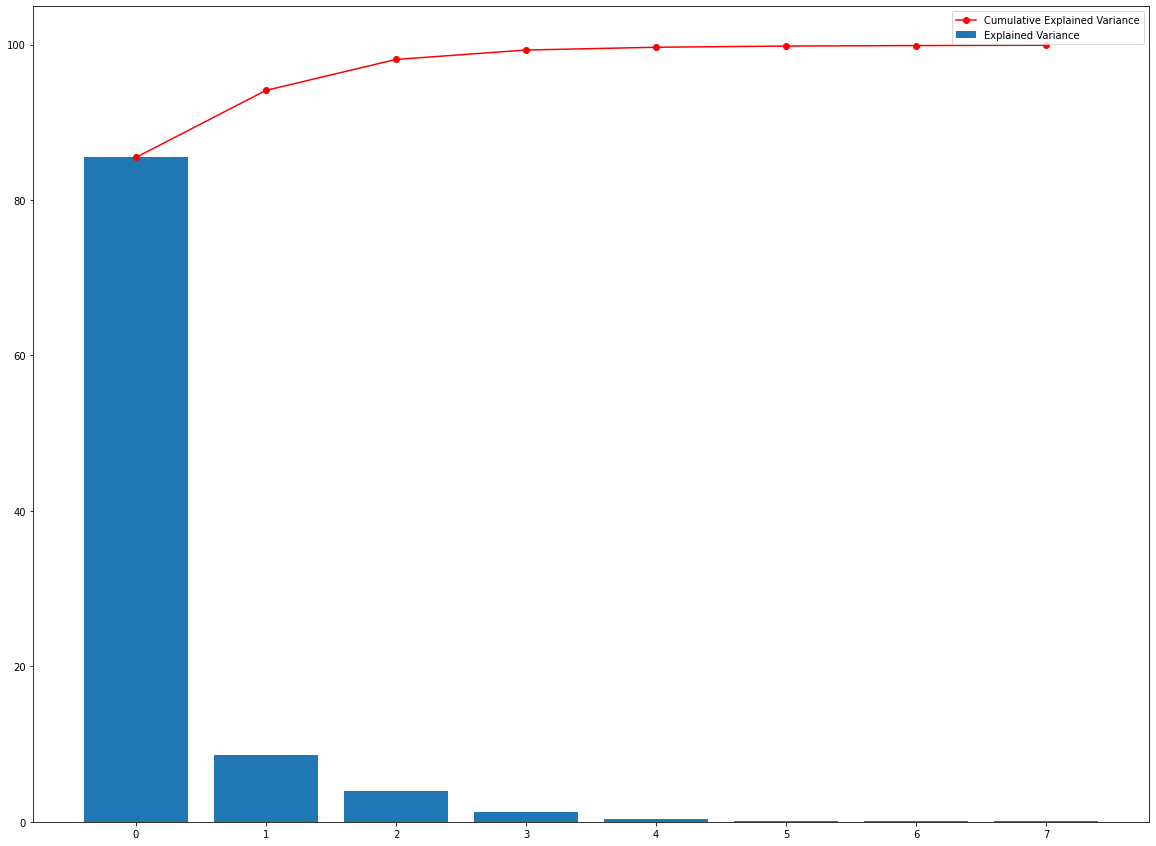

In [48]:
#3. Scree plot

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
expVar = expVar[0:8]
cumExpVar = cumExpVar[0:8]
plt.bar(range(8), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()


In [49]:
#4. No of PC's needed to cover 98 % of the dataset variance

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 85.47590445,  94.10558679,  98.08990311,  99.30079148,
        99.65862424,  99.8113032 ,  99.8744641 ,  99.91875382,
        99.94442571,  99.9666193 ,  99.97667849,  99.98351037,
        99.98804715,  99.9917002 ,  99.99399051,  99.99535537,
        99.9964488 ,  99.99718047,  99.99781163,  99.99825964,
        99.99865153,  99.99893343,  99.99917858,  99.99935209,
        99.99946151,  99.99954626,  99.99962391,  99.99968637,
        99.99973659,  99.99977844,  99.99981033,  99.9998396 ,
        99.99986021,  99.99987813,  99.99989412,  99.99990831,
        99.9999198 ,  99.99992963,  99.99993756,  99.99994412,
        99.99995051,  99.99995659,  99.99996145,  99.9999658 ,
        99.99996971,  99.99997289,  99.99997559,  99.9999778 ,
        99.99997996,  99.99998209,  99.99998389,  99.99998555,
        99.99998703,  99.99998821,  99.99998936,  99.99999034,
        99.99999128,  99.99999211,  99.99999275,  99.99999333,
        99.99999386,  99.99999435,  99.9999948 ,  99.99

4) From the cumExpVar array above, we see that ONLY three (3) eigenvectors are sufficient to explain 98 % of the variance in our dataset.

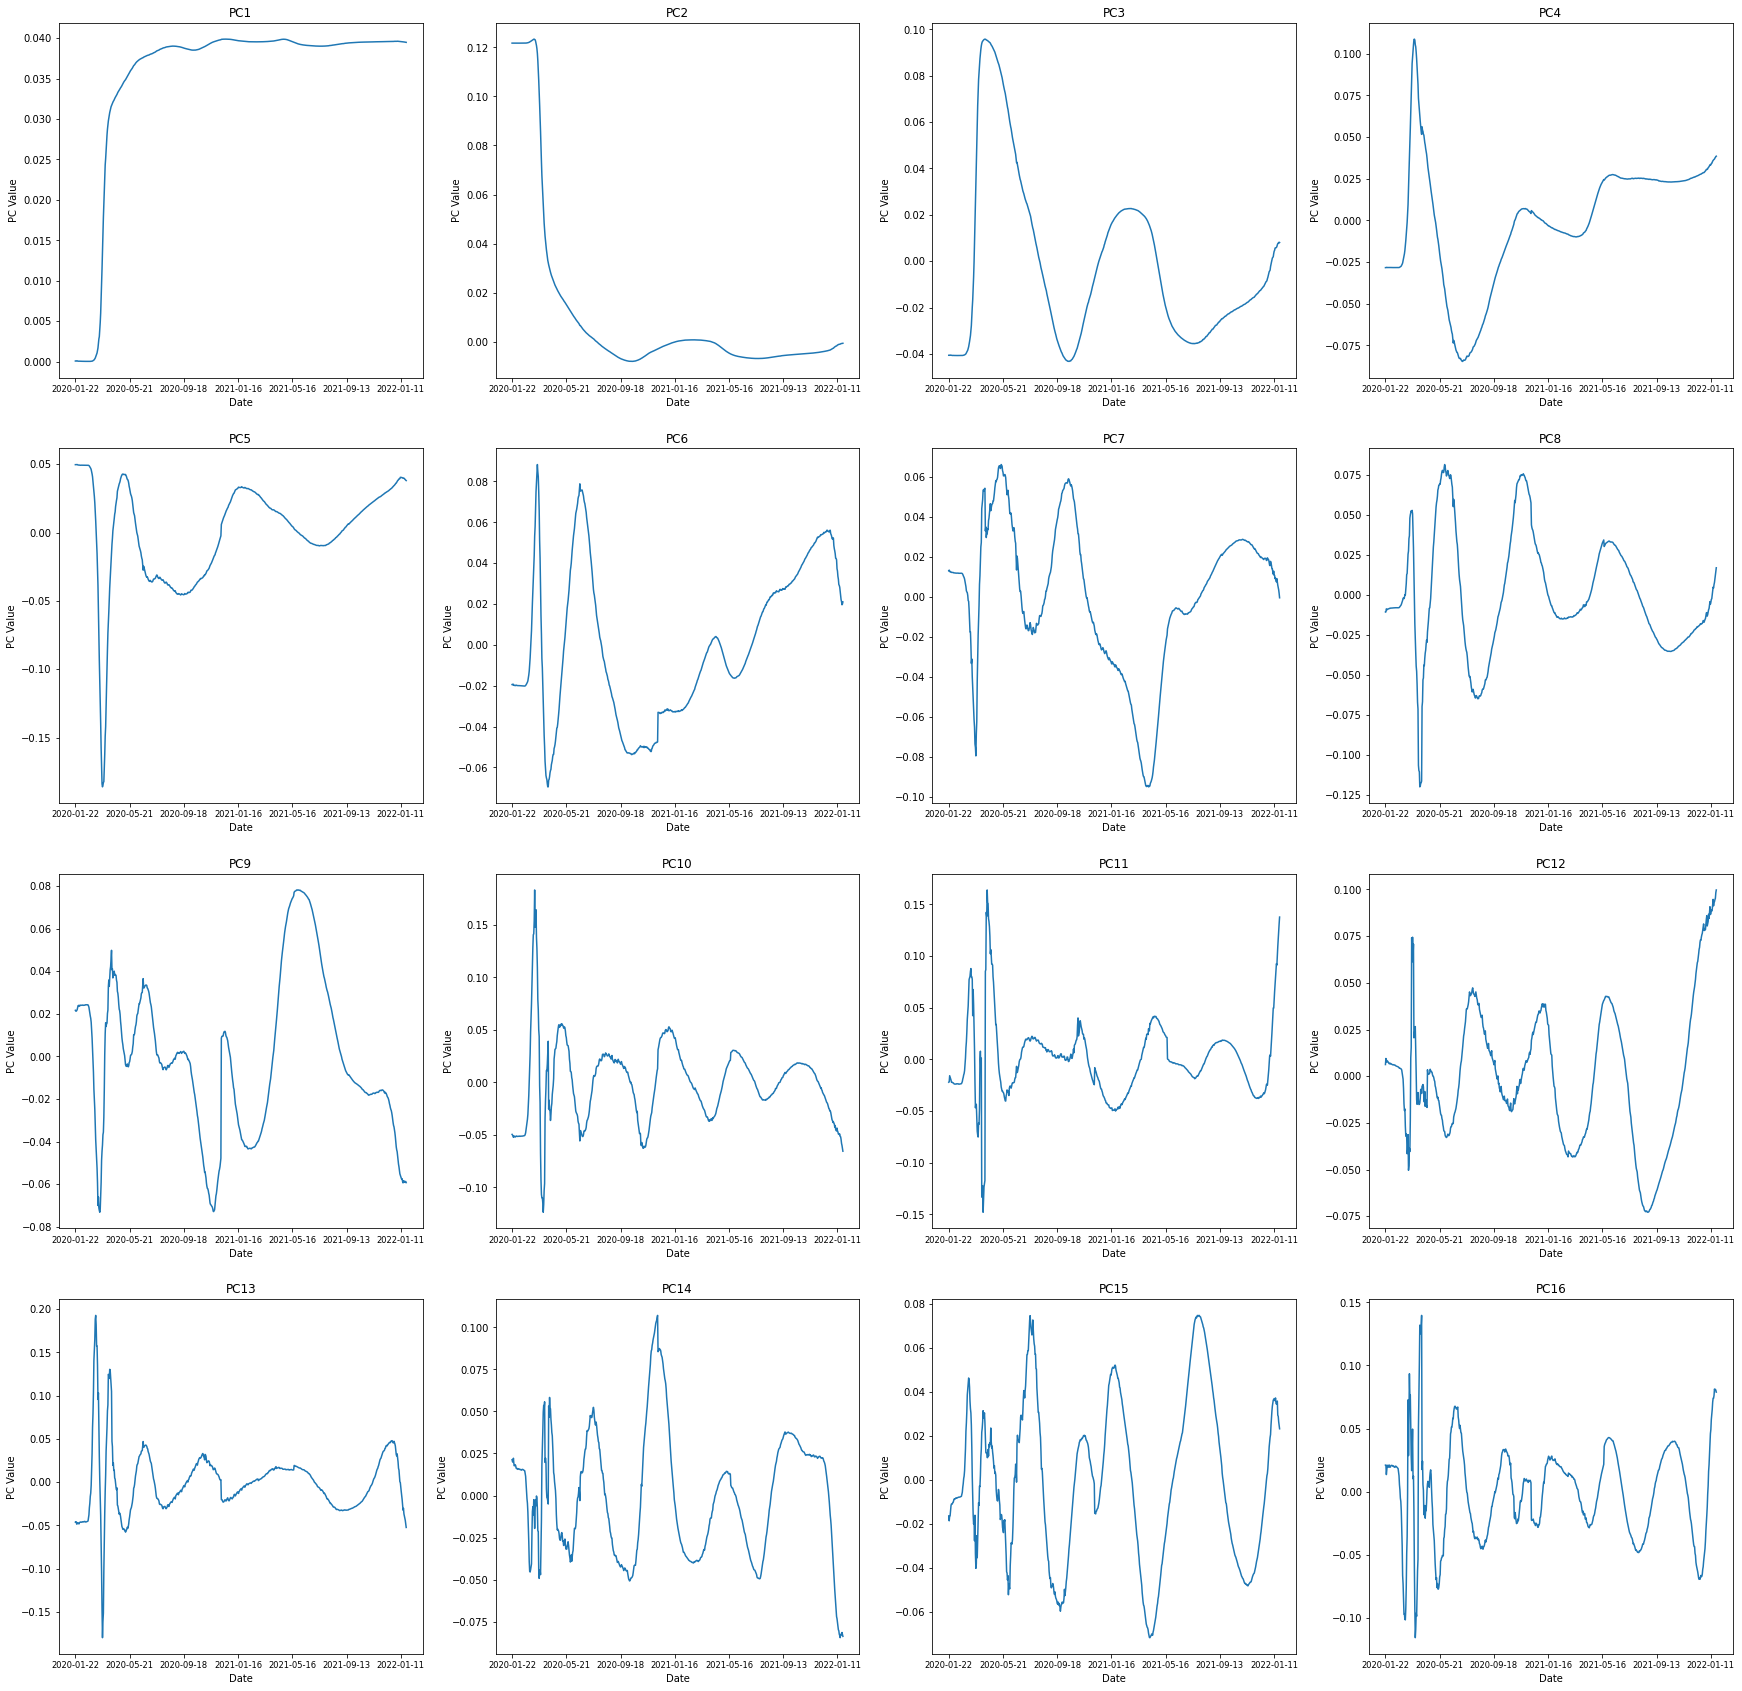

In [50]:
#5 Time-series plots for the eigenVectors

date_list = []
for i in range(0, df.shape[1], 120):
  date_list.append(df.columns[i])
plt.rcParams["figure.figsize"] = [30,30]
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.plot(df.columns, eigenVectors[:, i])
  plt.ylabel("PC Value")
  plt.xlabel("Date")
  plt.title(f'PC{1+i}')
  plt.xticks(ticks = np.arange(0, df.shape[1], 120), labels = date_list, size='small')

6) The first few principal components have a smooth rise and lowering of the curves while the remaining PCs are characterized with a lot of random variation (i.e noise). This indicates that these first few eigenvectors accounts for the highest variations in our dataset while the rest contains very minute information.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[0.5]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
def plot_country_figures(original_df, country_name):
  date_list = []
  for i in range(0, original_df.shape[1], 40):
    date_list.append(original_df.columns[i])
  
  plt.rcParams["figure.figsize"] = [20,10]
  # Figure 1
  plt.figure(1)
  plt.plot(original_df.columns, original_df.loc[country_name].values)
  plt.title(f"{country_name} COVID Cases")
  plt.xlabel("Date")
  plt.ylabel("Confirmed Cases")
  plt.xticks(ticks = np.arange(0, original_df.shape[1], 40), labels = date_list, size='small')
  
  #Figure 2
  scaler = StandardScaler()
  std_data = scaler.fit_transform(original_df)
  C = np.cov(std_data.T)
  eigenValues, eigenVectors = np.linalg.eigh(C)
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  plt.figure(2)
  OrgX_df_list = []
  PC_list = [1, 2, 4, 8, 16]
  for i in PC_list:
    W = eigenVectors[:, 0:i]
    ProjX = np.dot(std_data, W)
    ReconX = np.dot(ProjX, W.T)
    OrgX = scaler.inverse_transform(ReconX)
    OrgX_df = pd.DataFrame(data=OrgX, index=original_df.index, columns=original_df.columns)
    OrgX_df_list.append(OrgX_df)
    plt.plot(OrgX_df.columns, OrgX_df.loc[country_name].values, label = f'Reconstruction with first {i} PCs')
  plt.title(f"{country_name} PC-Reconstructed COVID Cases")
  plt.xlabel("Date")
  plt.ylabel("Confirmed Cases")
  plt.xticks(ticks = np.arange(0, OrgX_df.shape[1], 40), labels = date_list, size='small')
  plt.legend()

  #Figure 3
  RMSE = []
  PC_list = [1, 2, 4, 8, 16]
  for i in PC_list:
    W = eigenVectors[:, 0:i]
    ProjX = np.dot(std_data, W)
    ReconX = np.dot(ProjX, W.T)
    OrgX = scaler.inverse_transform(ReconX)
    OrgX_df = pd.DataFrame(data=OrgX, index=original_df.index, columns=original_df.columns)
    rms = mean_squared_error(y_true=original_df.loc[country_name].values, y_pred=OrgX_df.loc[country_name].values, squared=False)
    RMSE.append(rms)
  df = original_df
  df_reconstructed = OrgX_df_list[RMSE.index(min(RMSE))]   # Returns the df of best PCA reconstruction based on minimum RMSE
  residual_error_df = df - df_reconstructed
  plt.figure(3)
  plt.plot(residual_error_df.columns, residual_error_df.loc[country_name].values)
  plt.title("Residual error of best PCA reconstruction")
  plt.xlabel("Date")
  plt.ylabel("Residual error")
  plt.xticks(ticks = np.arange(0, residual_error_df.shape[1], 40), labels = date_list, size='small')

  #Figure 4
  No_of_components = []
  RMSE = []
  for i in range (1, 101):
     No_of_components.append(i)
     W = eigenVectors[:, 0:i]
     ProjX = np.dot(std_data, W)
     ReconX = np.dot(ProjX, W.T)
     OrgX = scaler.inverse_transform(ReconX)
     OrgX_df = pd.DataFrame(data=OrgX, index=original_df.index, columns=original_df.columns)
     rms = mean_squared_error(y_true=original_df.loc[country_name].values, y_pred=OrgX_df.loc[country_name].values, squared=False)
     RMSE.append(rms)
  plt.figure(4)
  plt.plot(No_of_components, RMSE)
  plt.title("RMSE of Reconstruction for the first 100 PCs")
  plt.xlabel("No of Components")
  plt.ylabel("RMSE")

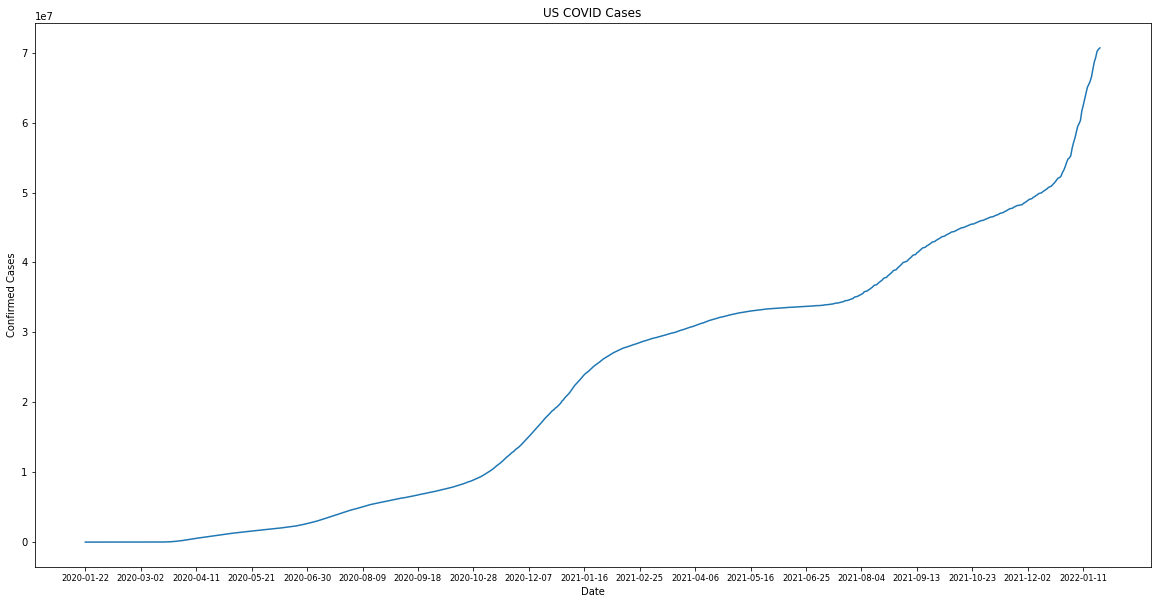

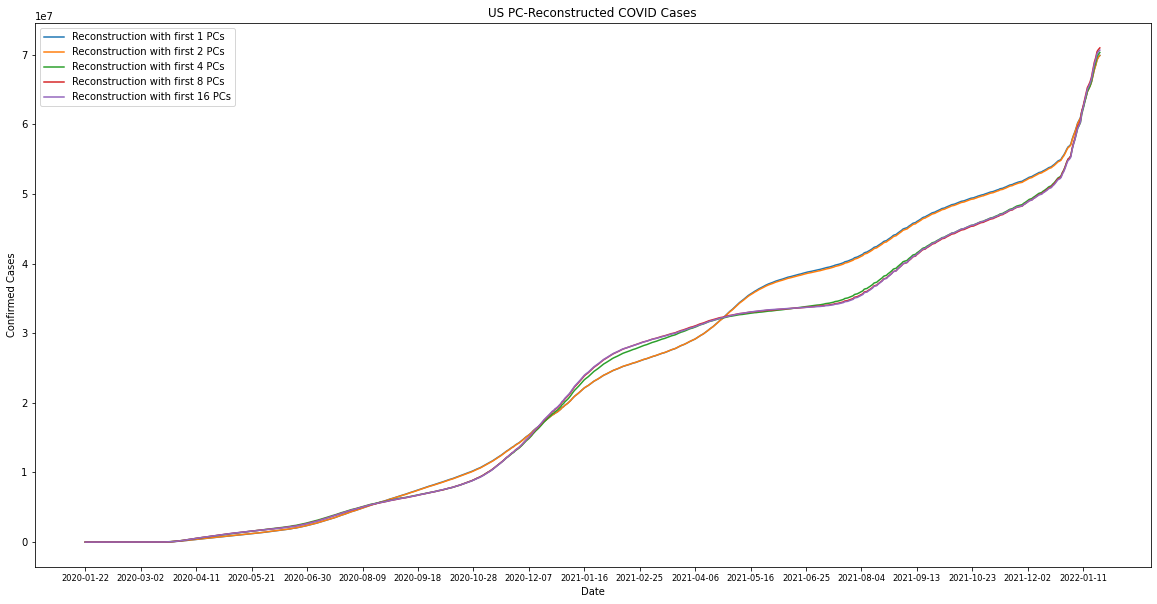

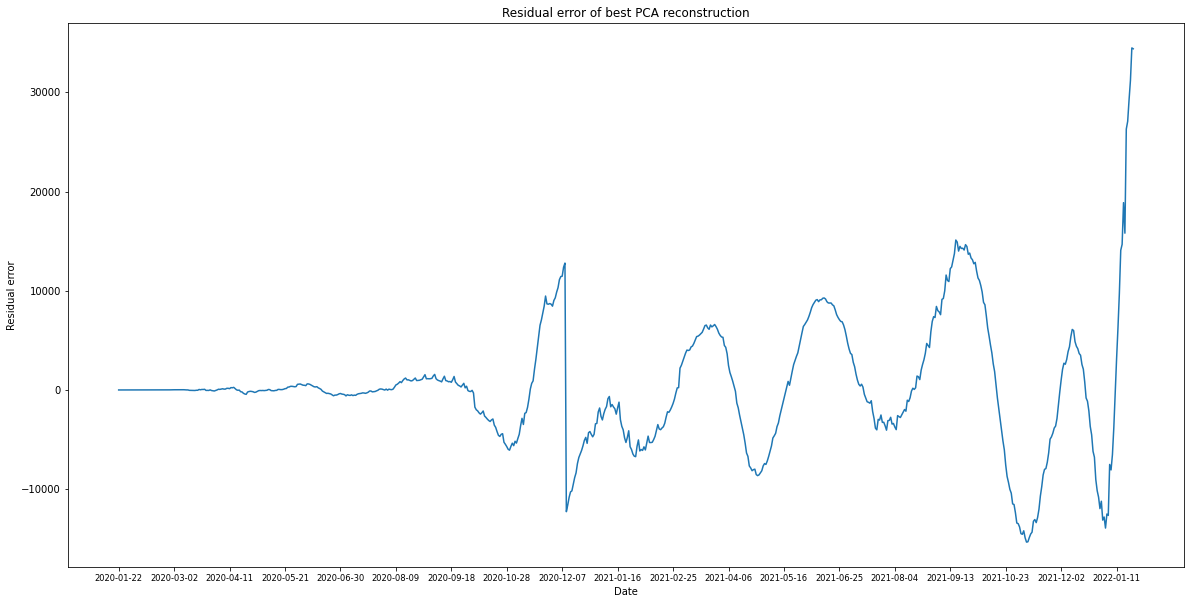

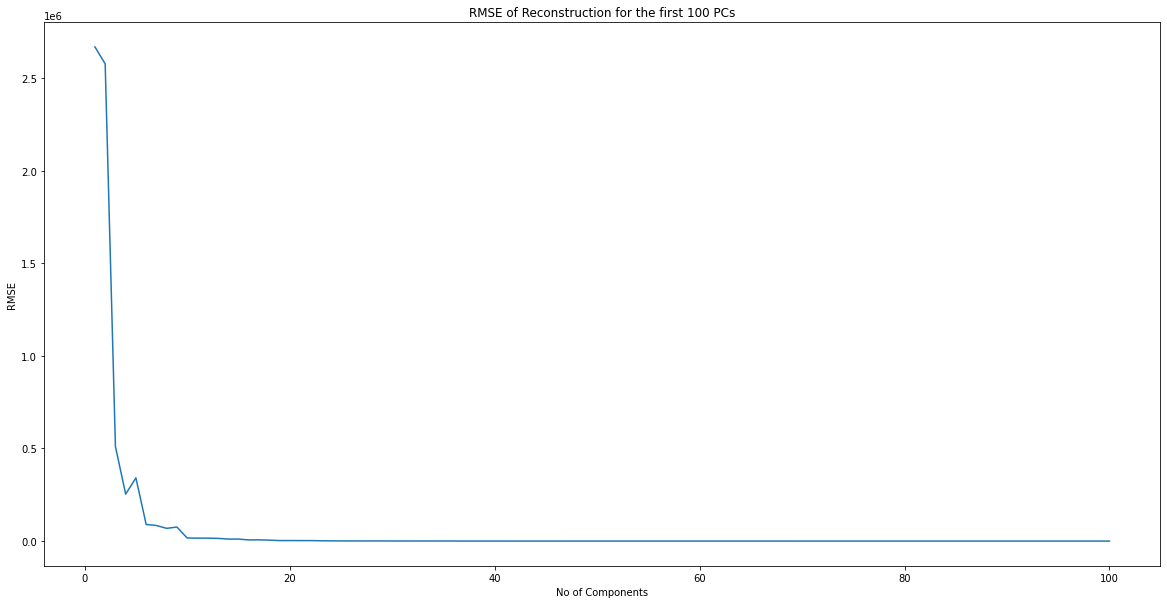

In [53]:
plot_country_figures(cases_raw, 'US')

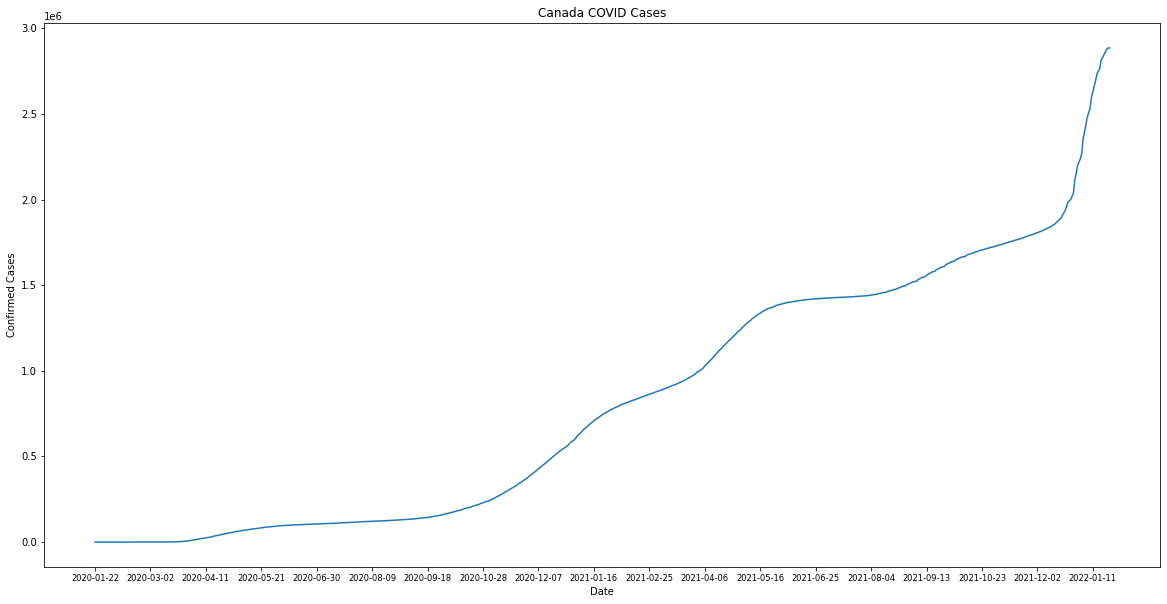

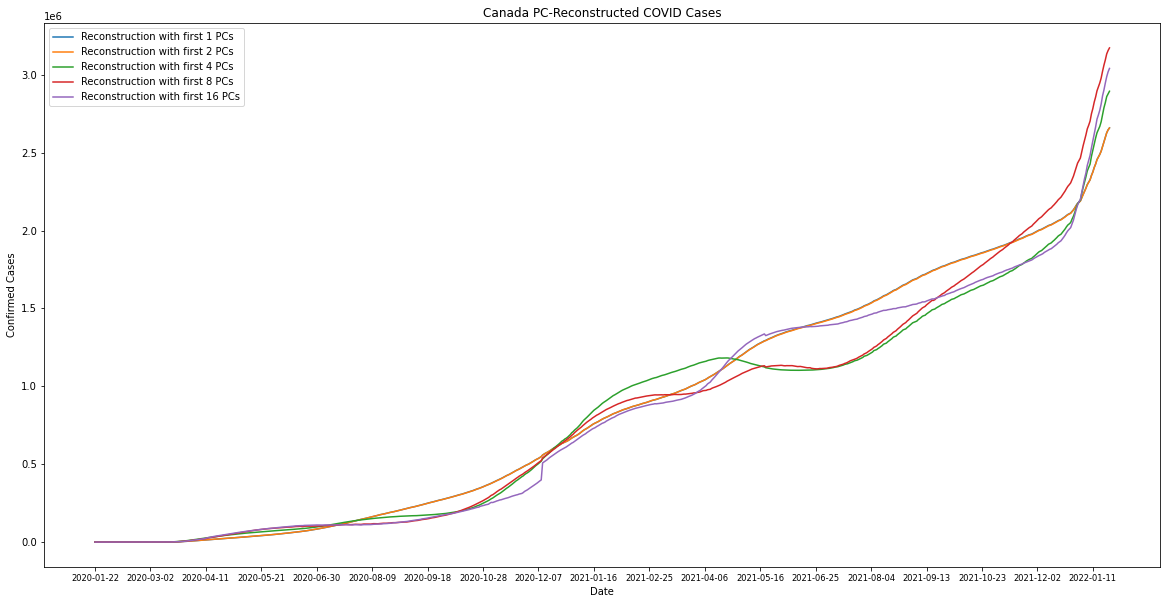

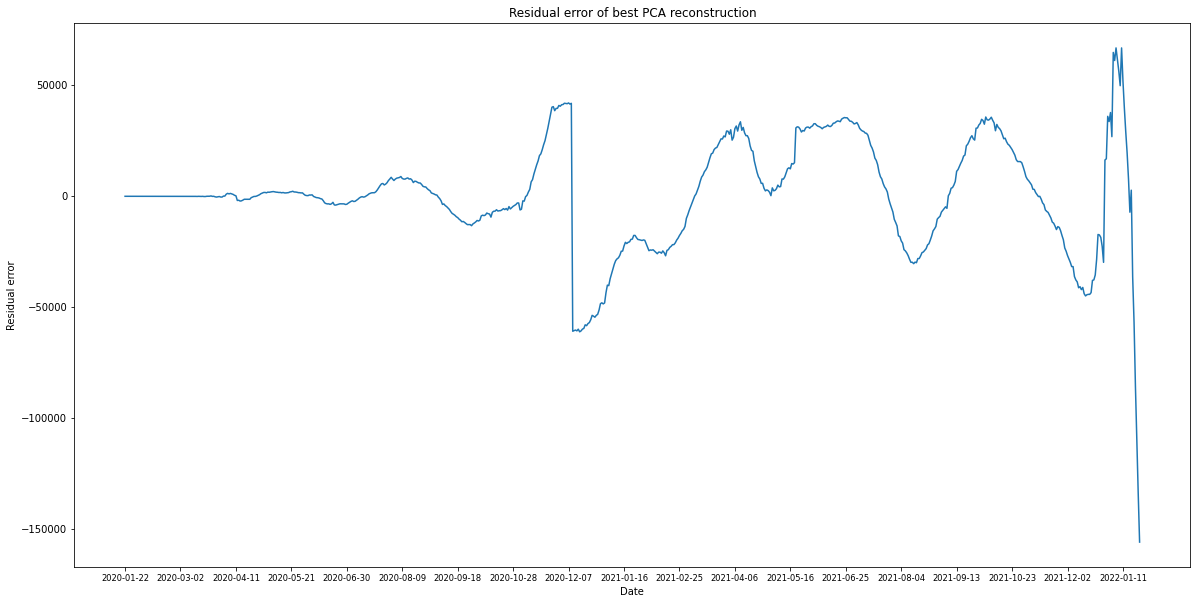

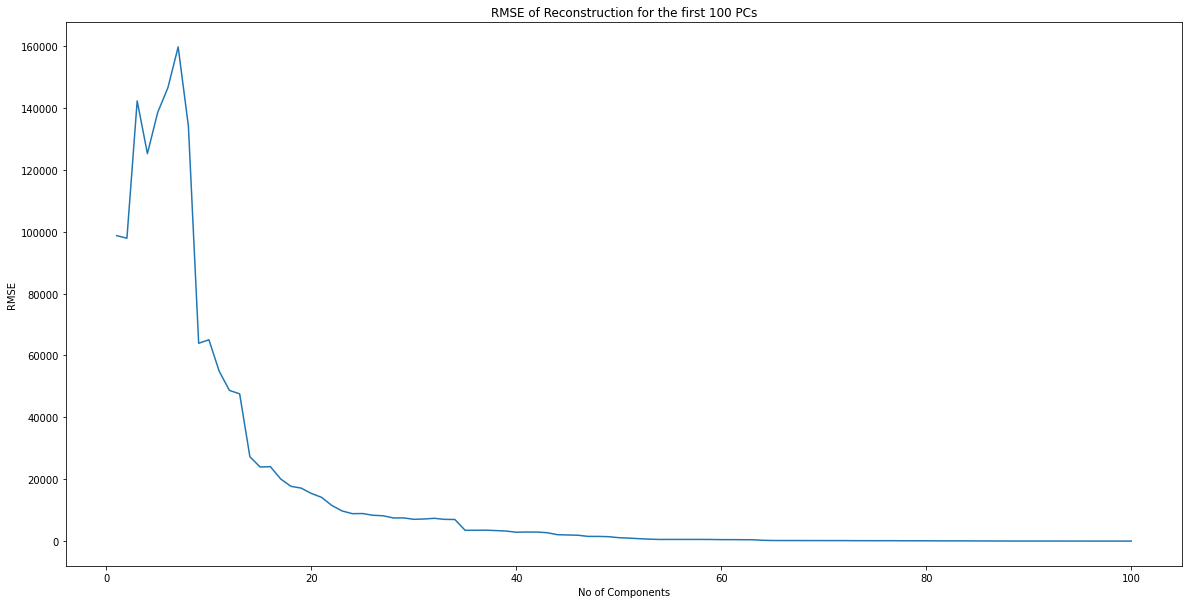

In [54]:
plot_country_figures(cases_raw, 'Canada')

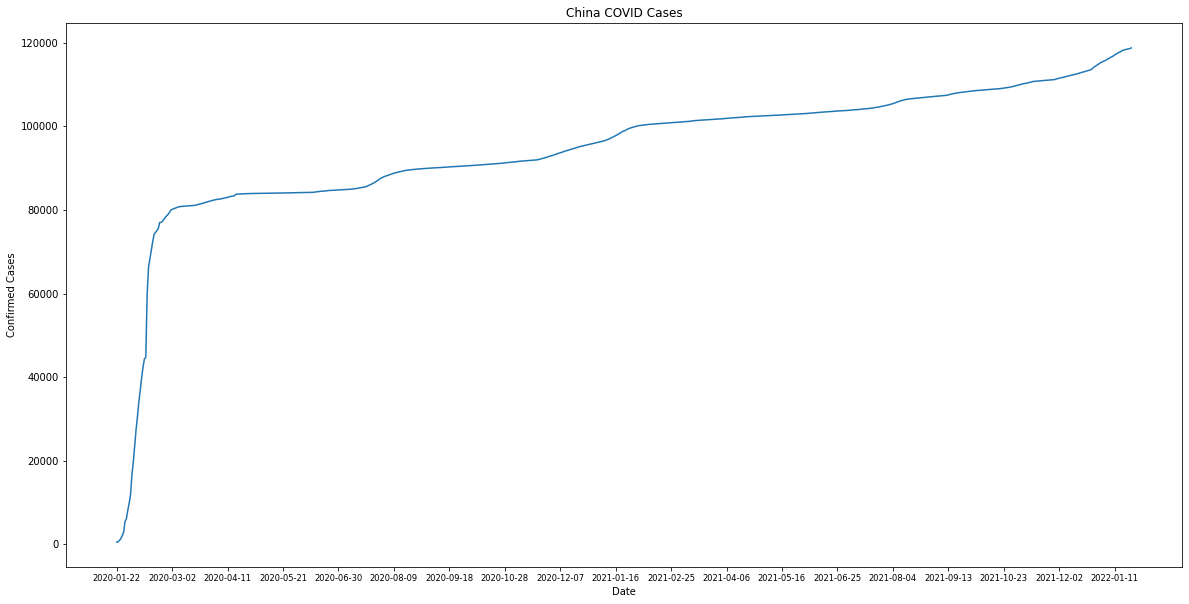

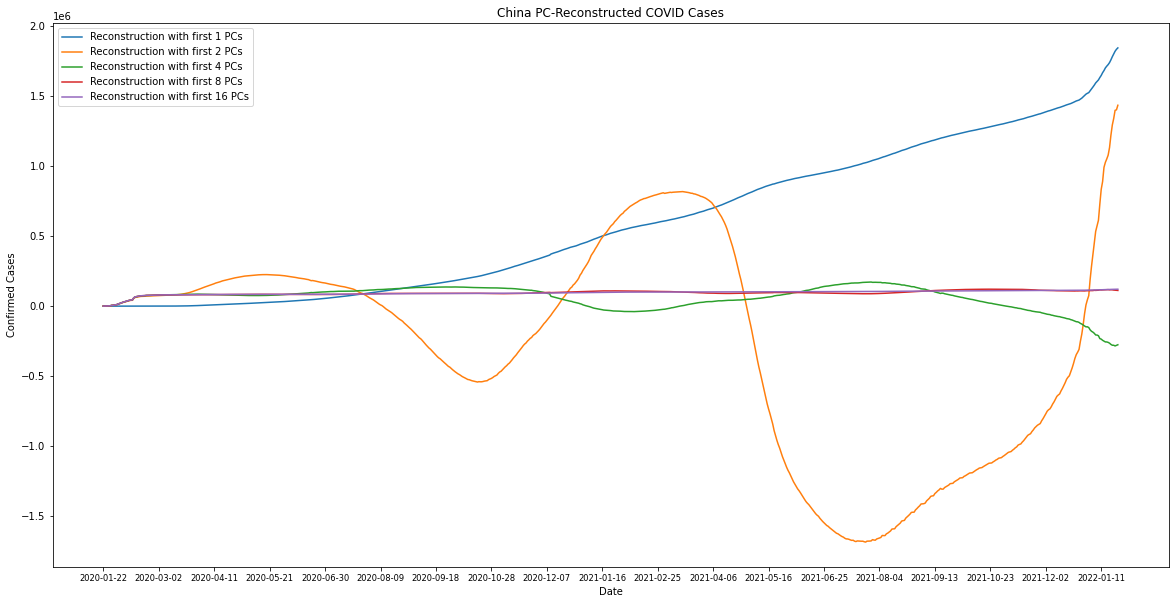

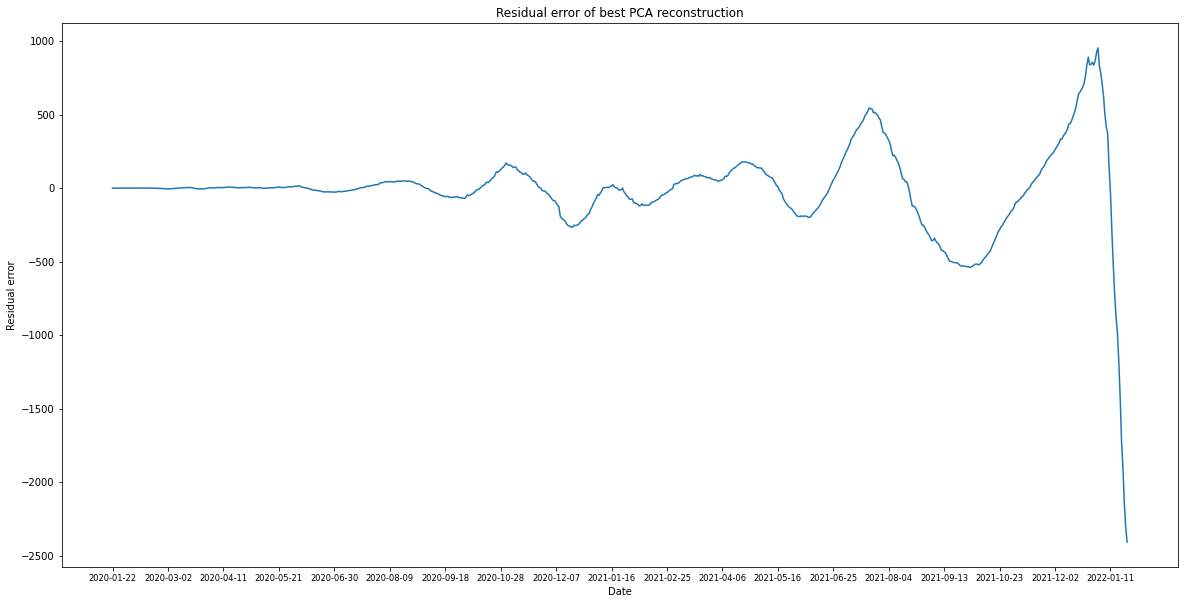

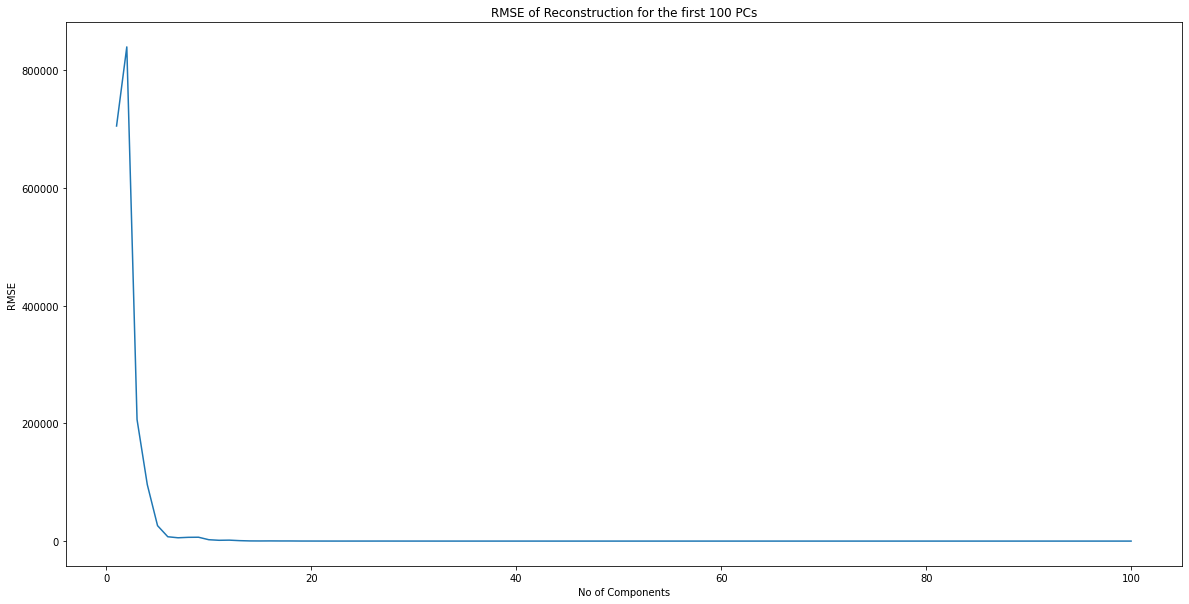

In [55]:
plot_country_figures(cases_raw, 'China')

# Part 4: SVD [2 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[0.5]**

Explain if standardization or covariance computation is required for this part.**[0.5]**

Repeat part 3 and compare your PCA and SVD results. **[1]**



In [56]:
def plot_country_figures(original_df, country_name):
  date_list = []
  for i in range(0, original_df.shape[1], 40):
    date_list.append(original_df.columns[i])
  
  plt.rcParams["figure.figsize"] = [20,10]
  # Figure 1
  plt.figure(1)
  plt.plot(original_df.columns, original_df.loc[country_name].values)
  plt.title(f"{country_name} COVID Cases")
  plt.xlabel("Date")
  plt.ylabel("Confirmed Cases")
  plt.xticks(ticks = np.arange(0, original_df.shape[1], 40), labels = date_list, size='small')
  
  #Figure 2
  U, S, VT = np.linalg.svd(original_df, full_matrices=True)     
  eigenVectors = VT.T                                         # Using SVD to extract the eigenVectors
  plt.figure(2)
  ReconX_df_list = []
  SV_list = [1, 2, 4, 8, 16]
  for i in SV_list:
    W = eigenVectors[:, 0:i]
    ProjX = (U[:,0:i] * S[0:i])
    ReconX = np.dot(ProjX, W.T)                               # Reconstruction of the data using SVD
    # ReconX = (U[:,0:i] * S[0:i]) @ VT[0:i,:]                # Direct reconstruction also works          
    ReconX_df = pd.DataFrame(data=ReconX, index=original_df.index, columns=original_df.columns)
    ReconX_df_list.append(ReconX_df)
    plt.plot(ReconX_df.columns, ReconX_df.loc[country_name].values, label = f'Reconstruction with first {i} PCs')
  plt.title(f"{country_name} SVD-Reconstructed COVID Cases")
  plt.xlabel("Date")
  plt.ylabel("Confirmed Cases")
  plt.xticks(ticks = np.arange(0, ReconX_df.shape[1], 40), labels = date_list, size='small')
  plt.legend()

  #Figure 3
  RMSE = []
  SV_list = [1, 2, 4, 8, 16]
  for i in SV_list:
    W = eigenVectors[:, 0:i]
    ProjX = (U[:,0:i] * S[0:i])
    ReconX = np.dot(ProjX, W.T)
    ReconX_df = pd.DataFrame(data=ReconX, index=original_df.index, columns=original_df.columns)
    rms = mean_squared_error(y_true=original_df.loc[country_name].values, y_pred=ReconX_df.loc[country_name].values, squared=False)
    RMSE.append(rms)
  df = original_df
  df_reconstructed = ReconX_df_list[RMSE.index(min(RMSE))]      # Returns the df of best SVD reconstruction based on minimum RMSE
  residual_error_df = df - df_reconstructed
  plt.figure(3)
  plt.plot(residual_error_df.columns, residual_error_df.loc[country_name].values)
  plt.title("Residual error of best SVD reconstruction")
  plt.xlabel("Date")
  plt.ylabel("Residual error")
  plt.xticks(ticks = np.arange(0, residual_error_df.shape[1], 40), labels = date_list, size='small')

  #Figure 4
  No_of_components = []
  RMSE = []
  for i in range (1, 101):
     No_of_components.append(i)
     ReconX = (U[:,0:i] * S[0:i]) @ VT[0:i,:]
     ReconX_df = pd.DataFrame(data=ReconX, index=original_df.index, columns=original_df.columns)
     rms = mean_squared_error(y_true=original_df.loc[country_name].values, y_pred=ReconX_df.loc[country_name].values, squared=False)
     RMSE.append(rms)
  plt.figure(4)
  plt.plot(No_of_components, RMSE)
  plt.title("RMSE of Reconstruction for the first 100 PCs")
  plt.xlabel("No of Components")
  plt.ylabel("RMSE")

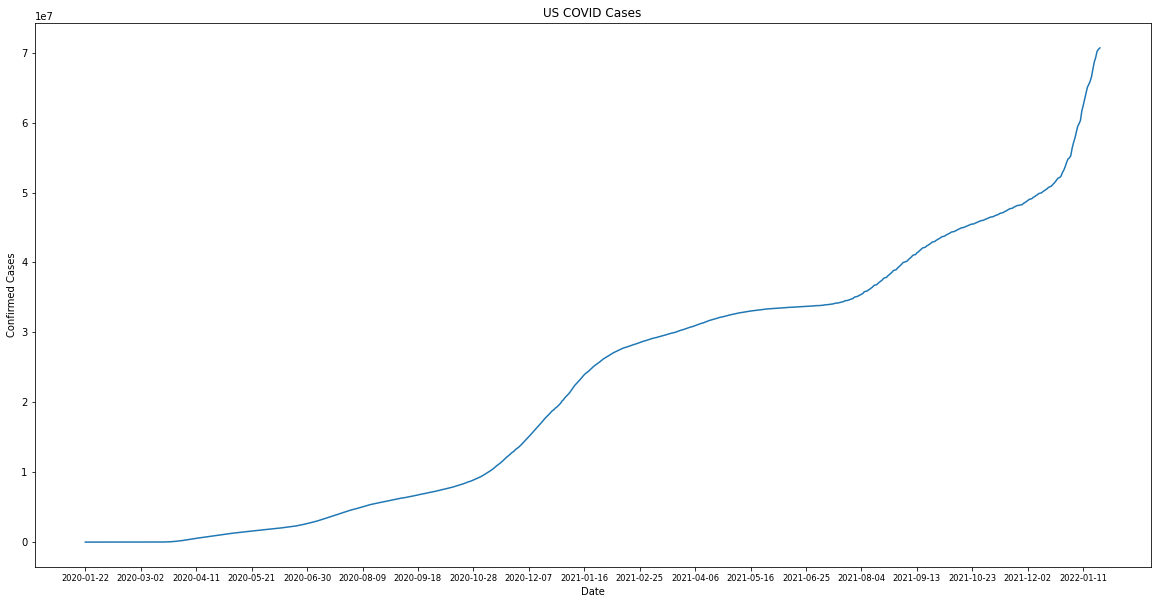

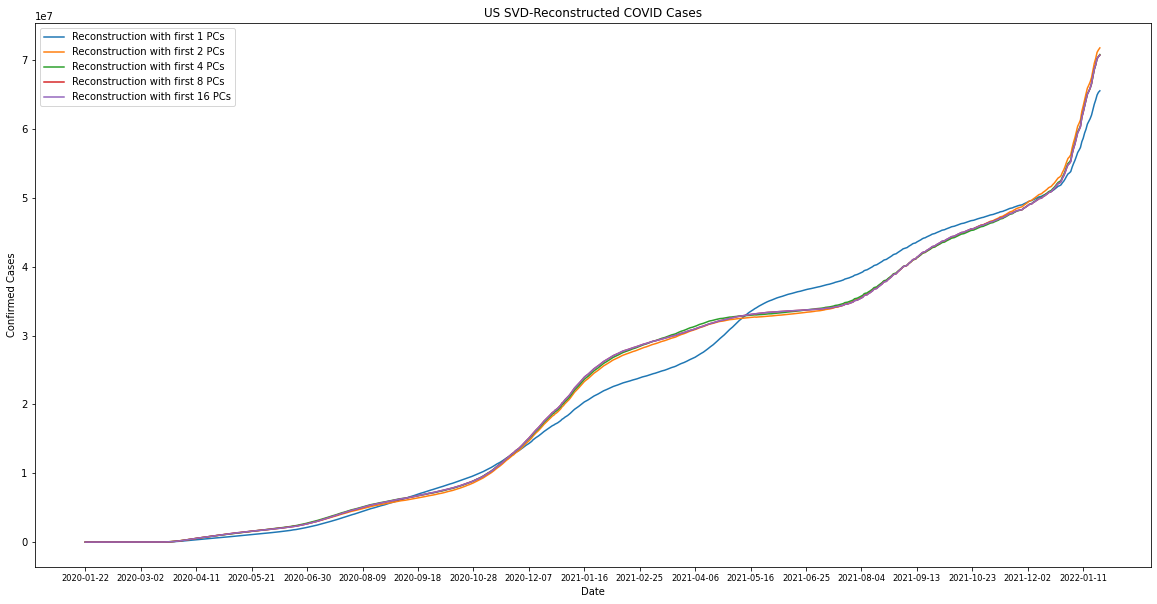

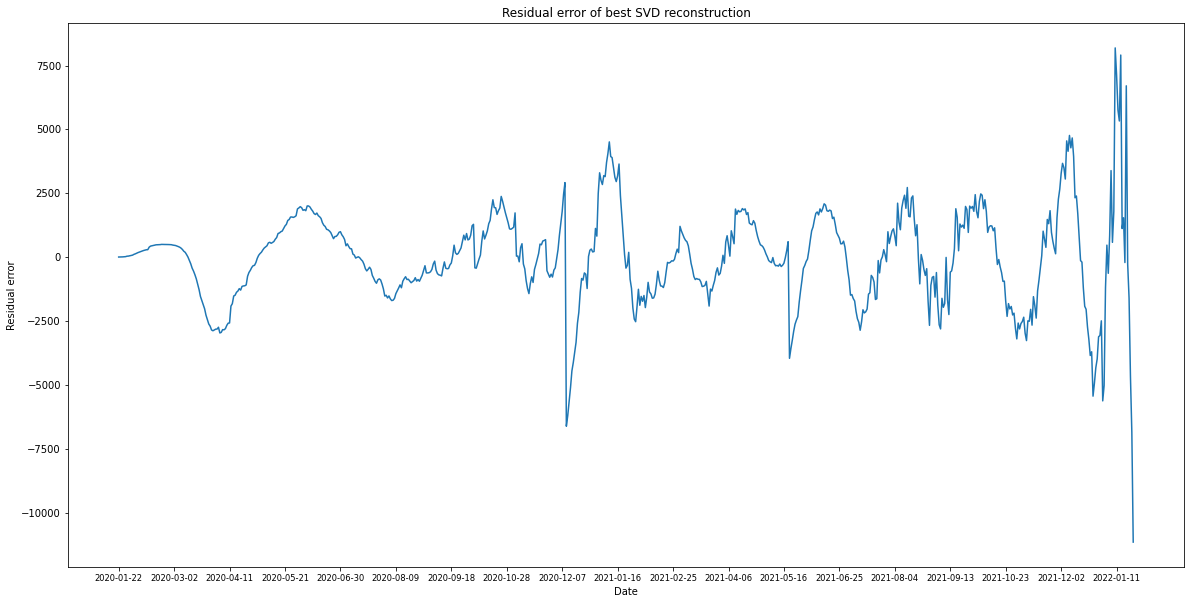

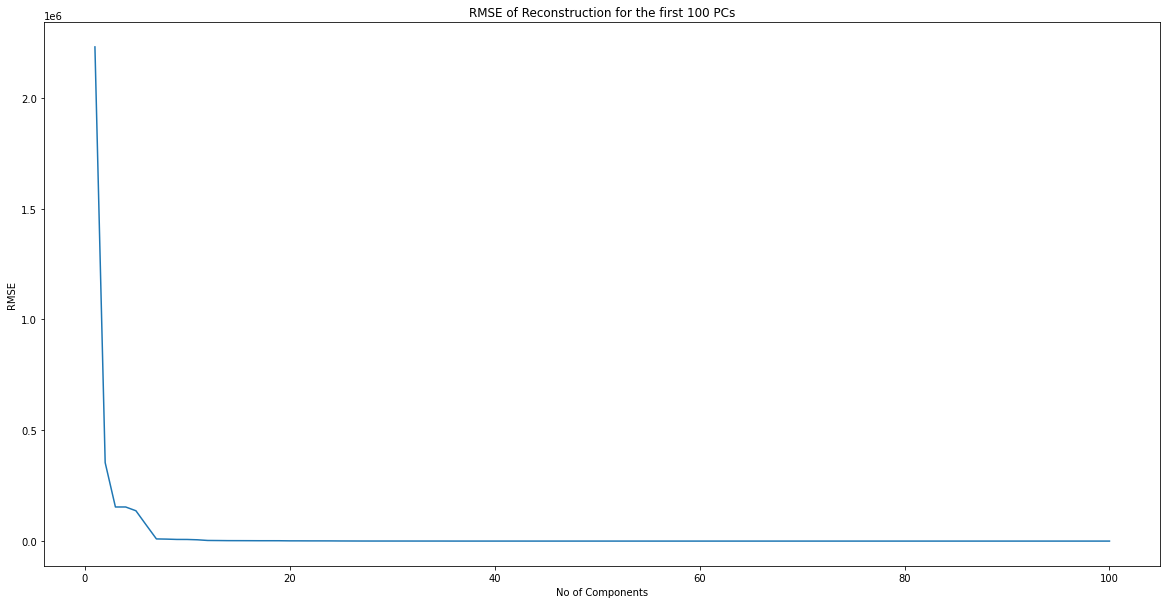

In [57]:
plot_country_figures(cases_raw, 'US')

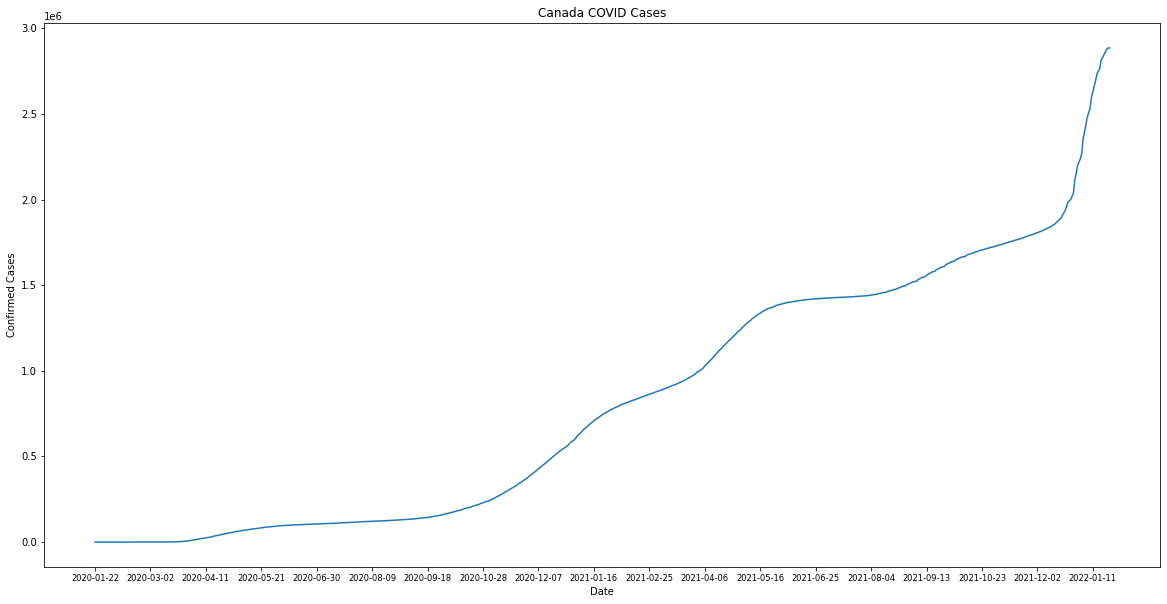

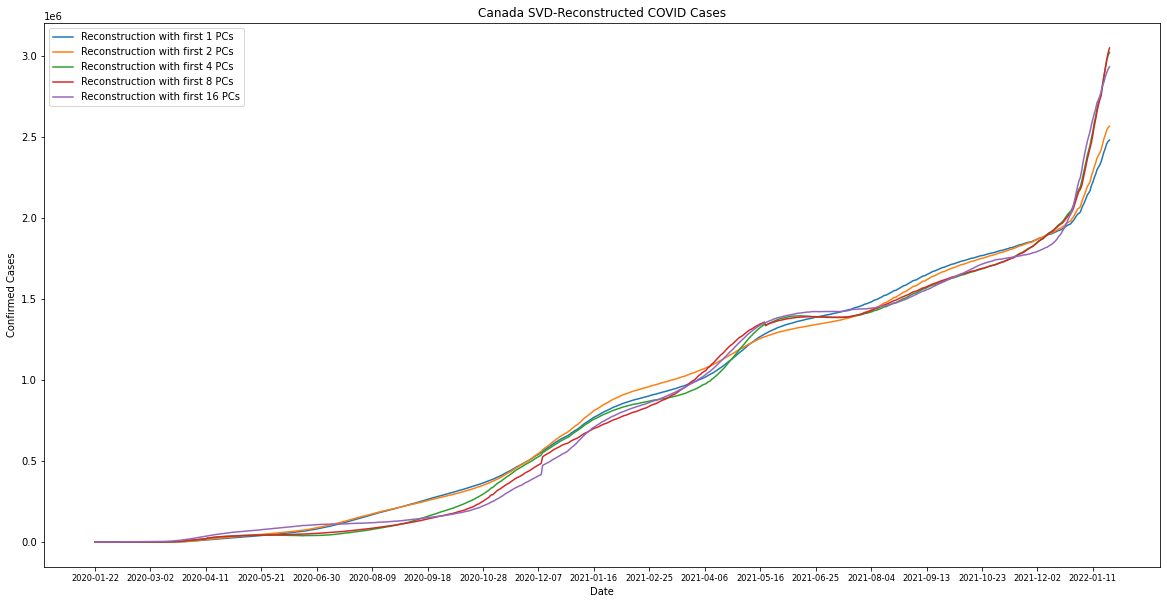

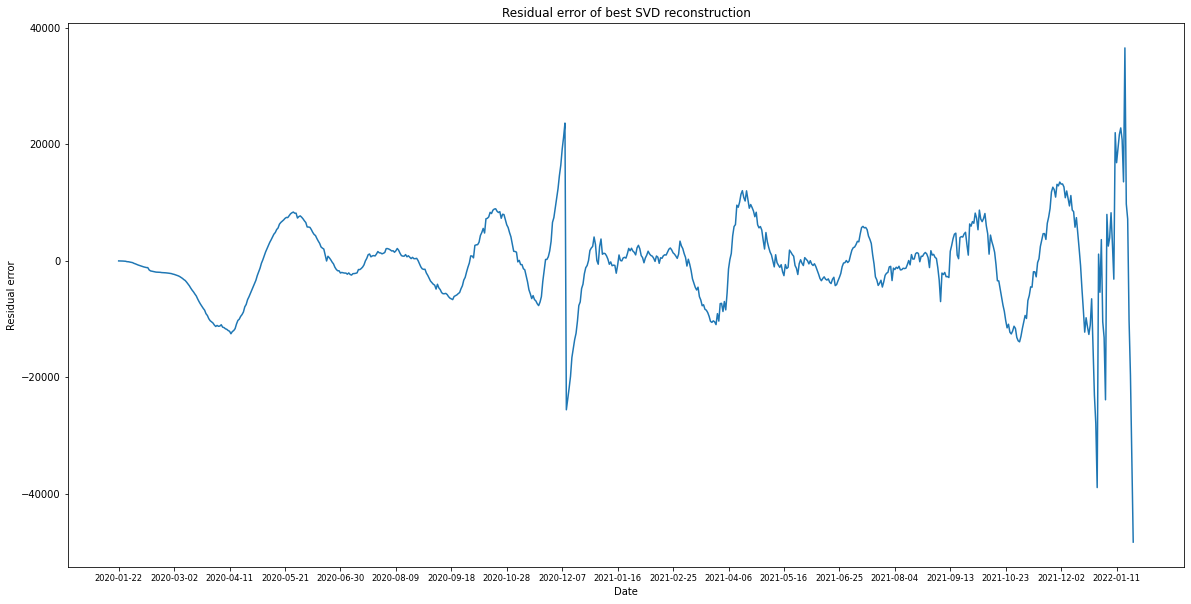

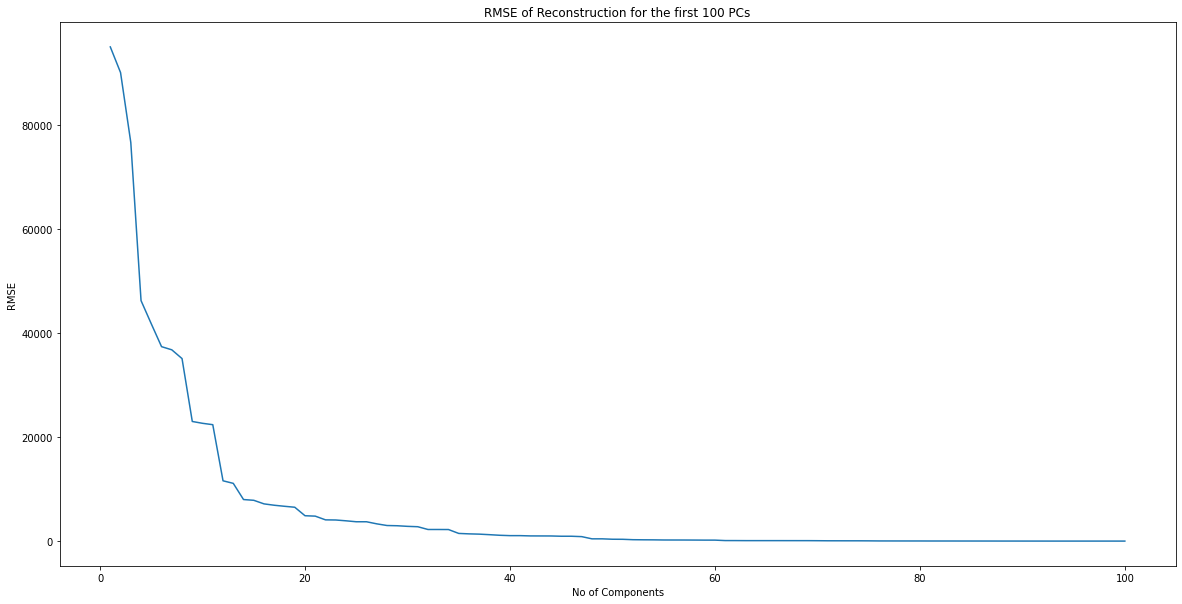

In [58]:
plot_country_figures(cases_raw, 'Canada')

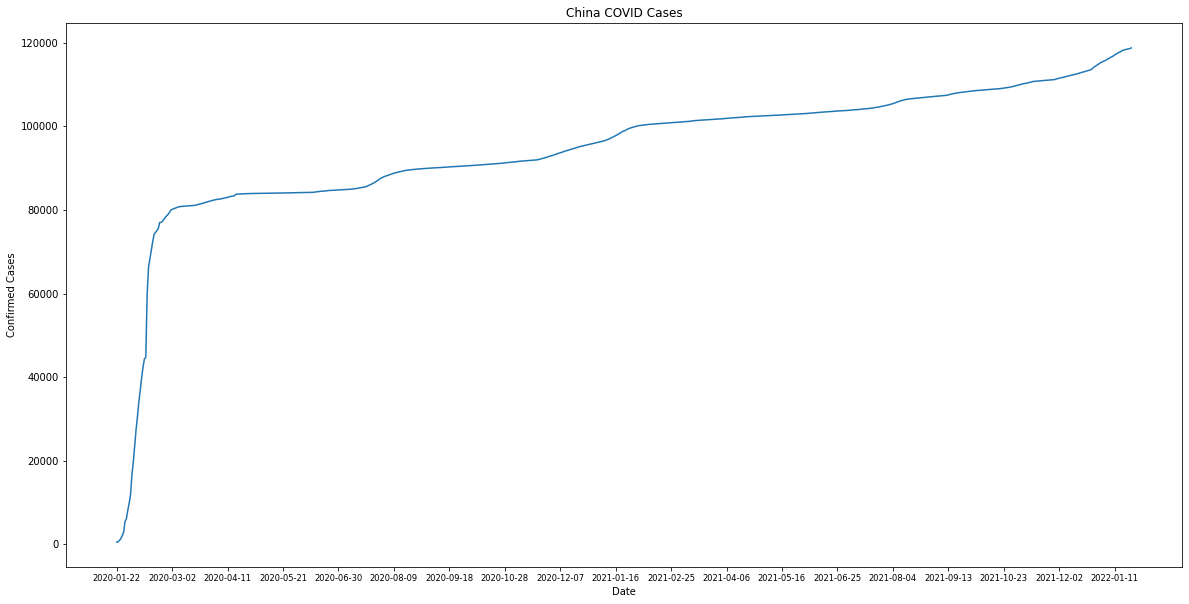

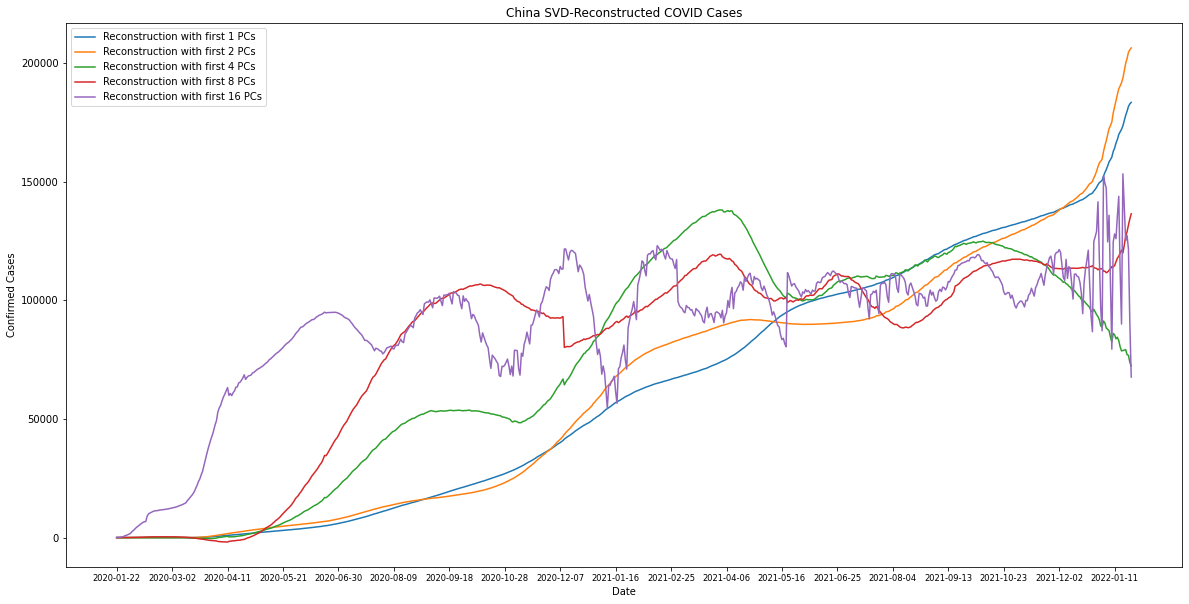

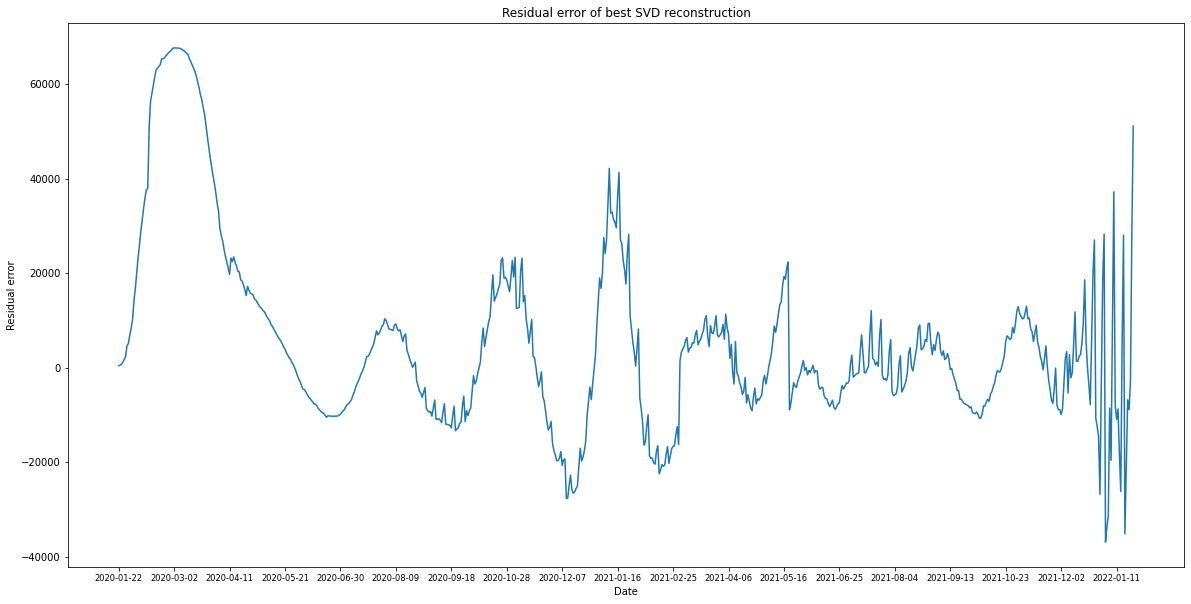

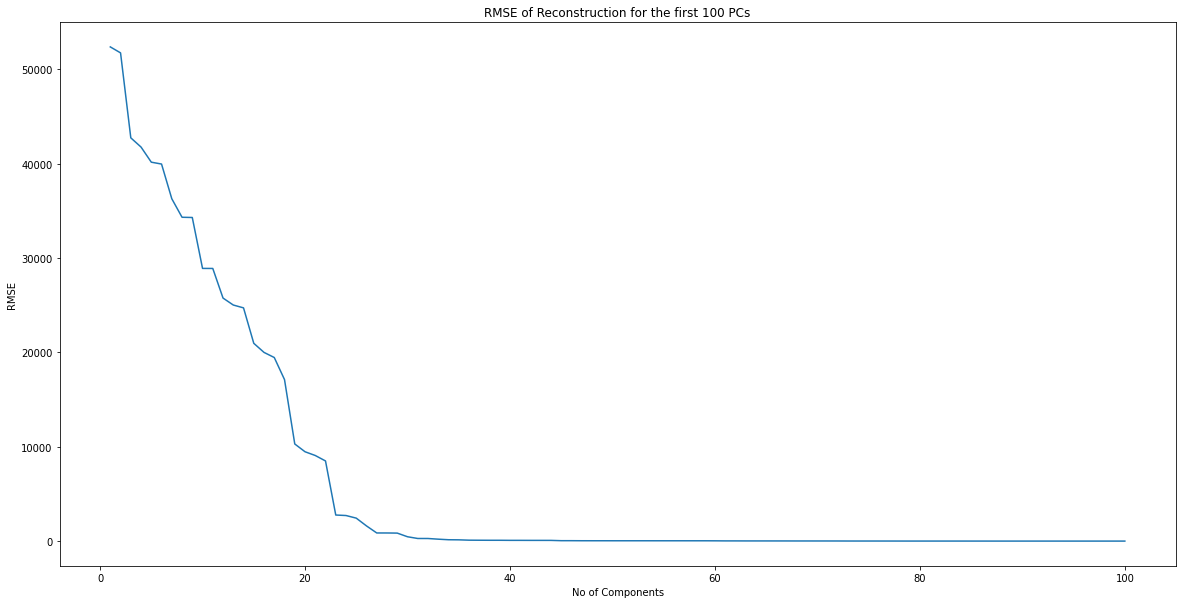

In [59]:
plot_country_figures(cases_raw, 'China')

Standardization of the dataset and computation of the covariance matrix is not needed with singular value decomposition (SVD). Since SVD decomposes the dataset X into smaller parts; X (N * M) = [U (N * N) * S (N * M)] @ VT (M * M).
Comparing the root mean sqaure error (RMSE) of the reconstruction using PCA in part 3 and SVD in part 4, it appears that the RMSE accross all components is similar for US and Canada . On the otherhand, the RMSE of SVD reconstruction for China seems very large than that of PCA as seen from the graphs. Also the reconstruction with SVD produced a lot of noise and random variation compared to the PCA reconstruction for China

# Part 5: Fashion-MNIST dataset [2 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. Why? **[0.25]**
* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.25]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ principal components. **[0.5]**
* Run your function a few times and determine how many components are required so that we (humans!) can identify the items. **[0.25]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and they can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[0.5]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [60]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [61]:
x.shape

(1000, 784)

In [62]:
# Creating a new dataset
import pandas as pd

# {0: "T-shirt/top", 2: "Pullover", 6: "Shirt"}
label_list = ['0', '2', '6']      # Choosing items of similar shape

df = pd.concat([x, y], axis=1)
df_2 = df[df['class'].isin(label_list)]
subset_df = df_2.drop(['class'], axis=1)
subset_class_df = df_2['class']
subset_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,82.0,237.0,231.0,70.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,16.0,142.0,66.0,33.0,0.0,0.0
985,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,0.0,0.0,134.0,158.0,88.0,0.0,0.0,0.0,0.0
987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
988,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,61.0,66.0,52.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape because they will have very close value for their pixel representations. This will produce a uniform eigenvector which makes compression and reconstruction much more smooth and noise free.

In [63]:
# Computing eigenvectors and eigenValues using SVD
import numpy as np

n, p = subset_df.shape
U, S, VT = np.linalg.svd(subset_df, full_matrices=True)
eigenVectors = VT.T
eigenValues = S**2 / (n-1)
eigenVectors, eigenValues


(array([[ 8.40695575e-18, -4.40169584e-17,  5.46244449e-17, ...,
          4.53933477e-02,  1.11366039e-02,  7.15134270e-03],
        [-2.35327235e-06, -3.50531404e-06,  3.53447249e-05, ...,
         -3.62742890e-02, -8.24349546e-03, -5.58240542e-03],
        [-4.19545536e-05,  4.00919674e-05,  7.89727990e-04, ...,
         -2.97190354e-02, -9.97388925e-03, -6.22126650e-03],
        ...,
        [-7.66932166e-04,  2.75231977e-03,  7.53746112e-03, ...,
          9.05176786e-01, -1.25323242e-02, -6.05303130e-03],
        [-6.62824494e-05,  1.80779172e-04,  1.25919260e-03, ...,
         -1.18830572e-02,  9.89896086e-01, -6.07900598e-03],
        [-2.24142554e-05,  3.90255913e-05,  5.15442052e-04, ...,
         -5.45424403e-03, -5.82384692e-03,  9.96012672e-01]]),
 array([1.01457263e+07, 6.40192878e+05, 2.26007741e+05, 1.28737469e+05,
        1.13177732e+05, 1.04301147e+05, 8.61160614e+04, 5.41442647e+04,
        4.79402514e+04, 4.37186441e+04, 3.94049695e+04, 3.54243159e+04,
        3.106

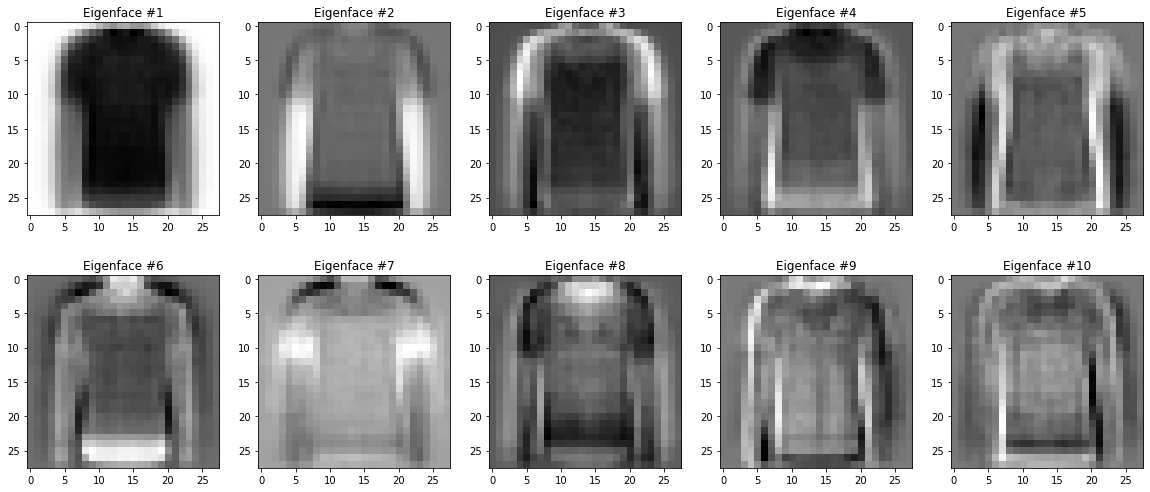

In [64]:
# Plot of first 10 eigenvectors as eigenfaces
import matplotlib.pyplot as plt 

COUNT = 10
ROWS = 2
fig = plt.figure(figsize=(20, 15))
for i in range(0, COUNT):
    plt.subplot(ROWS, 5, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title(f'Eigenface #{i+1}')
plt.subplots_adjust(wspace=0.2,hspace=-0.55)

The first few eigenfaces captures the maximum variance of our dataset and as the eigenfaces increases, the noise in the images increased significantly (i.e they became blur)

In [65]:
# Buiding a function for reconstruction 
import matplotlib.pyplot as plt 

def reconstruction(n):
  plt.figure(1)
  fig = plt.figure(figsize=(10, 5))
  plt.gray() 
  ind = 7                                                           # Random image chosen (ind 7 from subset_df)
  plt.imshow(subset_df.loc[ind].values.reshape(28,28)) 
  print ("Label is:", target_encoding[int(subset_class_df[ind])])
  plt.show() 

  plt.figure(2)
  fig = plt.figure(figsize=(20, 15))
  for i in range(n):
    W = eigenVectors[:, 0:(i+1)]
    ProjX = (U[:,0:(i+1)] * S[0:(i+1)])
    ReconX = np.dot(ProjX, W.T)
    # ReconX = (U[:,0:(i+1)] * S[0:(i+1)]) @ VT[0:(i+1),:]
    plt.subplot(4, 5, i+1)
    plt.imshow(ReconX[4, :].reshape(28,28), cmap = plt.cm.gray)       # Plots the PC reconstruction of image (ind 7) in the subset_df
    plt.title(f"Reconstruction: {i+1} PCs")                    # NB: ReconX array does not follow the index of subset_df
  plt.subplots_adjust(wspace=0.2,hspace=0.3)

Label is: Pullover


<Figure size 1440x720 with 0 Axes>

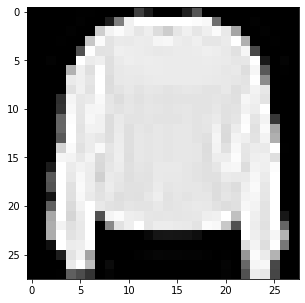

<Figure size 1440x720 with 0 Axes>

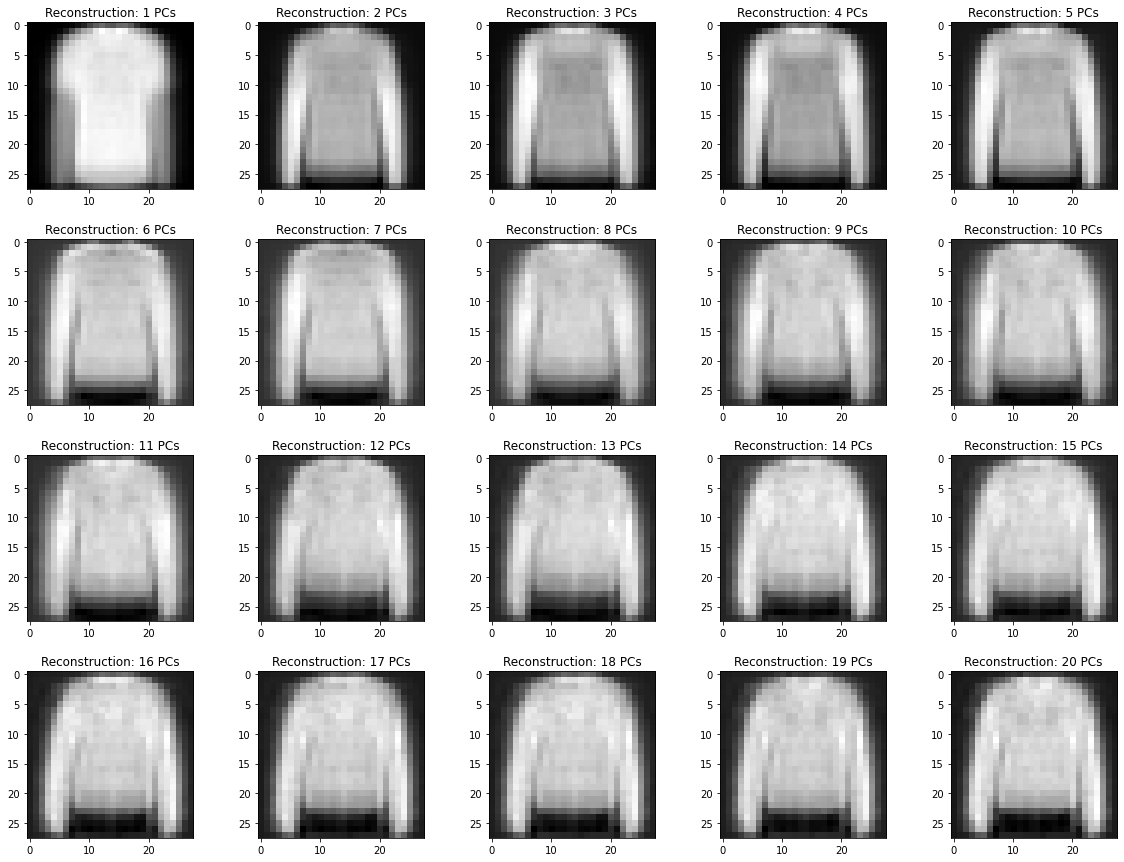

In [66]:
reconstruction(20)

Compared to the original image, 20 components are sufficient for we humans to identify the item.

In [67]:
# Compression ratio of a dataset with 1000 images

n, p = x.shape
Total_elements_original = n * p    # Size of original dataset
U, S, VT = np.linalg.svd(x, full_matrices=True)
eigenVectors = VT.T
W = eigenVectors[:, 0:20]
n_W, p_W = W.shape                 # Shape of projection matrix (W) if ONLY 20 components are needed as determined above
ProjX = (U[:,0:20] * S[0:20])
n_ProjX, p_ProjX = ProjX.shape     # Shape of projections if ONLY 20 components
Total_elements_reconstruction = (n_ProjX * p_ProjX) + (n_W * p_W)     # Total size of reconstruction elements (chosen eigenvectors [20] & projections)

# Compression ratio
Compression_ratio = Total_elements_original / Total_elements_reconstruction
Compression_ratio

21.973094170403588

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

